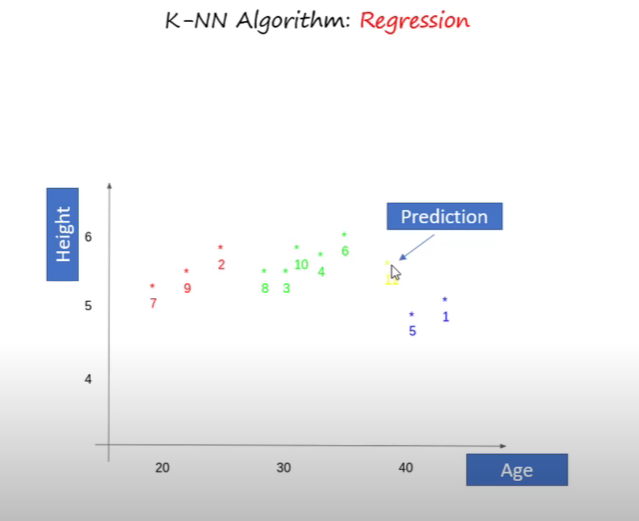

In [1]:
from IPython.display import Image, display


image_files = [
    '/content/Screenshot_20250310_094043.png'

]


for image_file in image_files:
    display(Image(filename=image_file))




*KNN regression* is a simple way to predict a number (like a house price) based on similar examples from your data. Here’s how it works:

- **How It Works:**  
  Imagine you want to know the value of a new point. KNN finds the “K” closest points (neighbors) in your past data using a distance measure (usually Euclidean distance). It then takes the average of those neighbors’ target values (like averaging the prices of similar houses) and uses that as the prediction.  
- **No Assumptions About the Data:**  
  KNN doesn’t assume your data follows any specific pattern (like a straight line). This flexibility means it can handle complicated, non-linear relationships.

---

**Comparing KNN Regression and Linear Regression**

- **Assumptions about Data:**
  - *KNN Regression* makes almost no assumptions about the form of the relationship. It simply “looks around” in the data.
  - *Linear Regression* assumes a straight-line (or linear) relationship between the predictors and the target.
  
- **Flexibility:**
  - *KNN Regression* can adapt to complex, non-linear patterns, because it bases predictions on local neighbors.
  - *Linear Regression* is less flexible; if the true relationship isn’t a straight line, its predictions might not be as good.

- **Interpretability:**
  - *Linear Regression* is easy to understand because the coefficients tell you how each predictor affects the target.
  - *KNN Regression* doesn’t provide such direct explanations since it’s simply averaging nearby values.

- **Extrapolation:**
  - *Linear Regression* can make predictions outside the range of your training data (extrapolation).
  - *KNN Regression* only predicts values within the range of the observed data, since it’s based on neighbors it has seen.

- **Speed and Complexity:**
  - *Linear Regression* is usually faster and works well with large datasets.
  - *KNN Regression* can become slow with very large datasets because it needs to calculate distances to every data point for each prediction.

In summary, if you believe the relationship is complex or non-linear and you have a dataset that covers the range of your new observations well, KNN regression can work nicely. But if you want a simple, fast, and easy-to-interpret model—and you think the relationship is roughly linear—linear regression might be the better choice.



Dataset preview:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Linear Regression Performance:
MSE: 0.5559
R²: 0.5758

KNN Regression (k=5) Performance:
MSE: 1.1187
R²: 0.1463

Best k found by GridSearchCV: 9

Tuned KNN Regression Performance:
MSE: 1.1033
R²: 0.1581


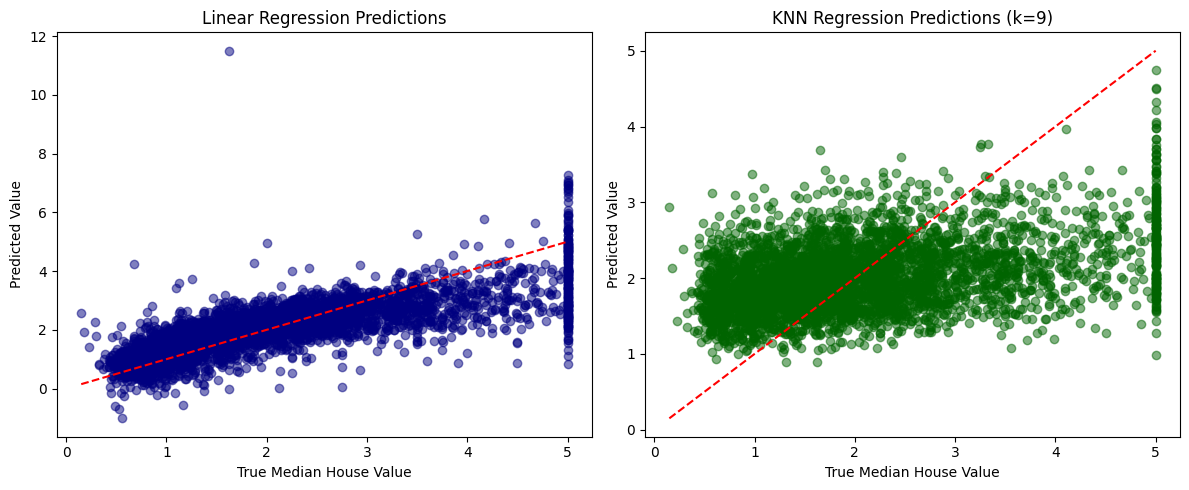

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset as a DataFrame
data = fetch_california_housing(as_frame=True)
df = data.frame

# Display the first few rows
print("Dataset preview:")
print(df.head())

# Define features (X) and target (y)
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Linear Regression Model
# ------------------------------
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Calculate performance metrics for Linear Regression
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nLinear Regression Performance:")
print(f"MSE: {mse_lr:.4f}")
print(f"R²: {r2_lr:.4f}")

# ------------------------------
# KNN Regression Model with Default k=5
# ------------------------------
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Calculate performance metrics for KNN (default k=5)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("\nKNN Regression (k=5) Performance:")
print(f"MSE: {mse_knn:.4f}")
print(f"R²: {r2_knn:.4f}")

# ------------------------------
# Tuning KNN: Find the Best k Using GridSearchCV
# ------------------------------
param_grid = {'n_neighbors': list(range(1, 31))}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_k = grid_search.best_params_['n_neighbors']

print(f"\nBest k found by GridSearchCV: {best_k}")

# Fit KNN with the best k
knn_best = KNeighborsRegressor(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)

# Calculate performance metrics for tuned KNN
mse_knn_best = mean_squared_error(y_test, y_pred_knn_best)
r2_knn_best = r2_score(y_test, y_pred_knn_best)

print("\nTuned KNN Regression Performance:")
print(f"MSE: {mse_knn_best:.4f}")
print(f"R²: {r2_knn_best:.4f}")

# ------------------------------
# Plotting: Compare Predictions
# ------------------------------
plt.figure(figsize=(12, 5))

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5, color='navy')
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Value")
plt.title("Linear Regression Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line

# Scatter plot for Tuned KNN Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_knn_best, alpha=0.5, color='darkgreen')
plt.xlabel("True Median House Value")
plt.ylabel("Predicted Value")
plt.title(f"KNN Regression Predictions (k={best_k})")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line

plt.tight_layout()
plt.show()
